# Project 2: 

## Assignment Scenario

You are a data scientist in ClimateChange company. You are given an air-quality data set. The dataset contains the following features/predictors and label/target.

This dataset has the following features:

No: row number, 

year,

month,

day,

hour: hour of data in this row,

PM10: PM10 concentration (ug/m^3),

SO2: SO2 concentration (ug/m^3),

NO2: NO2 concentration (ug/m^3),

CO: CO concentration (ug/m^3),

O3: O3 concentration (ug/m^3),

TEMP: temperature (degree Celsius),

PRES: pressure (hPa),

DEWP: dew point temperature (degree Celsius),

RAIN: precipitation (mm),

wd: wind direction,

WSPM: wind speed (m/s),

The only target/label is: PM2.5: PM2.5 concentration (ug/m^3).

You are asked to perform the following tasks by using the attached Jupyter Notebook and writing a script in Python and run all the cells. You only need to submit a JupyterNotebook.

Data Source: Beijing Multi-site Air Quality Data SetLinks to an external site.


### Steps and Questions

1. Load the dataset, PRSA_Data.csv, into memory.

2. Clean the data and check missing values for this dataset.

3. Convert all categorical variables to numerical values.

4. Split the data into 80% of training and 20% of the test dataset.

5. Preprocess the data using the normalization method to convert all features into the range of [0,1]

6. Build a neuron network with two hidden layers of 20 and 10 neurons to forecast PM2.5 using all other features and TensorFlow. Does it overfit or underfit the data? Please justify your answer.

7. Tune the model using the following hyperparameters using keras-tuner:
    First hidden layer with units between 20 and 50 with a step size of 5
    Second hidden layer with units between 5 and 10 with a step size of 1
    The dropout rate for both hidden layer is between 0.2 and 0.8 with a step size of 0.1
    
    Please recommend the optimal model and specify the hyperparameters.

8. Build a neuron network with two hidden layers of 20 and 10 neurons to forecast PM2.5 using all other features and PyTorch. Does it overfit or underfit the data? Please justify your answer.

## Load Necessary Libraries

In [1]:
# Import necessary libraries for data handling, preprocessing, model building, and evaluation

# Data handling and preprocessing
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# TensorFlow for deep learning models
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
from tensorflow.keras.layers import Dropout

# PyTorch for alternative deep learning model
import torch
import torch.nn as nn
import torch.optim as optim

# Plotting and visualization
import matplotlib.pyplot as plt

# Set random seed for reproducibility
import random
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)
random.seed(42)

# Display configuration for plots
%matplotlib inline

### Question 1: Load the Dataset

In [2]:
# Define the folder path containing the CSV files
folder_path = '/Users/matthewmoore/Downloads/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228'

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Load each CSV file into a DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Append to the list
        data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_aq = pd.concat(data_frames, ignore_index=True)


In [3]:
df_aq.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [4]:
df_aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


### Question 2: Clean the Data and Check for Missing Values

In [5]:
# Check for missing values in each column

missing_values = df_aq.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [6]:
df_aq.shape

(420768, 18)

### 3. Convert All Categorical Variables

In [7]:
# Convert categorical variables to numerical using one-hot encoding
df_aq = pd.get_dummies(df_aq, columns=['wd','station'], drop_first=True)  # Replace 'wd' with any other categorical columns


In [8]:
# Fill all remaining missing values with the median of each column
df_aq.fillna(df_aq.median(), inplace=True)

# Verify that there are no remaining missing values
print("Remaining missing values per column:\n", df_aq.isnull().sum())


Remaining missing values per column:
 No                       0
year                     0
month                    0
day                      0
hour                     0
PM2.5                    0
PM10                     0
SO2                      0
NO2                      0
CO                       0
O3                       0
TEMP                     0
PRES                     0
DEWP                     0
RAIN                     0
WSPM                     0
wd_ENE                   0
wd_ESE                   0
wd_N                     0
wd_NE                    0
wd_NNE                   0
wd_NNW                   0
wd_NW                    0
wd_S                     0
wd_SE                    0
wd_SSE                   0
wd_SSW                   0
wd_SW                    0
wd_W                     0
wd_WNW                   0
wd_WSW                   0
station_Changping        0
station_Dingling         0
station_Dongsi           0
station_Guanyuan         0
station_Gucheng  

### 4. Split the Data (80% Training, 20% Test)

In [9]:
# Define features and target
X = df_aq.drop(columns=['PM2.5'])  # Features
y = df_aq['PM2.5']                 # Target

# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Normalize the Dataset

In [10]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6. Build Neural Network (2 Hidden Layers)

In [11]:
# Define the neural network model
model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and validate on the validation set
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

Epoch 1/50
8416/8416 [==============================] - 8s 929us/step - loss: 1993.8539 - val_loss: 932.8148
Epoch 2/50
8416/8416 [==============================] - 8s 921us/step - loss: 871.0633 - val_loss: 849.9861
Epoch 3/50
8416/8416 [==============================] - 8s 907us/step - loss: 810.1132 - val_loss: 813.9775
Epoch 4/50
8416/8416 [==============================] - 8s 915us/step - loss: 775.2734 - val_loss: 774.9833
Epoch 5/50
8416/8416 [==============================] - 8s 918us/step - loss: 750.7864 - val_loss: 752.0331
Epoch 6/50
8416/8416 [==============================] - 8s 913us/step - loss: 730.4859 - val_loss: 729.0713
Epoch 7/50
8416/8416 [==============================] - 8s 913us/step - loss: 713.8265 - val_loss: 723.5967
Epoch 8/50
8416/8416 [==============================] - 8s 910us/step - loss: 698.7560 - val_loss: 699.1582
Epoch 9/50
8416/8416 [==============================] - 8s 905us/step - loss: 684.6754 - val_loss: 682.9742
Epoch 10/50
8416/8416 [====

In [12]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

2630/2630 [==============================] - 2s 654us/step - loss: 611.0059
Test Loss: 611.005859375


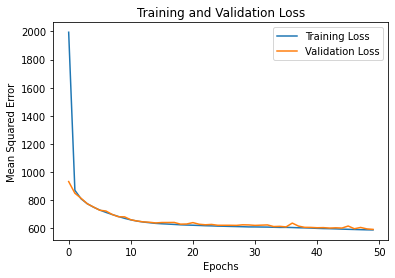

In [13]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


### TensorFlow Model: Overfit or Underfit?

In [14]:
#!pip install keras-tuner -q

In [15]:
import shutil

# Step 1: Remove the tuner results directory to reset trials
shutil.rmtree('tuner_results', ignore_errors=True)



# Define a function to build the model with hyperparameters for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # First hidden layer with tuned units and dropout
    model.add(Dense(units=hp.Int('units1', min_value=20, max_value=50, step=5), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.2, max_value=0.8, step=0.1)))
    
    # Second hidden layer with tuned units and dropout
    model.add(Dense(units=hp.Int('units2', min_value=5, max_value=10, step=1), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.2, max_value=0.8, step=0.1)))
    
    # Output layer
    model.add(Dense(1))

    # Compile the model
    optimizer = Adam(learning_rate = 0.01)
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize Keras Tuner with RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='air_quality_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hyperparameters.values)


Trial 5 Complete [01h 21m 01s]
val_loss: 845.3844909667969

Best val_loss So Far: 691.2640991210938
Total elapsed time: 02h 19m 14s
Best hyperparameters: {'units1': 35, 'dropout1': 0.4, 'units2': 10, 'dropout2': 0.4}


Epoch 1/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1386.4341 - val_loss: 704.5671
Epoch 2/20
8416/8416 [==============================] - 8s 1ms/step - loss: 1383.6202 - val_loss: 749.3997
Epoch 3/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1384.5319 - val_loss: 708.8855
Epoch 4/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1388.4559 - val_loss: 810.2988
Epoch 5/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1389.4836 - val_loss: 821.4312
Epoch 6/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1378.1754 - val_loss: 752.5421
Epoch 7/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1375.6768 - val_loss: 763.2645
Epoch 8/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1384.2616 - val_loss: 740.6132
Epoch 9/20
8416/8416 [==============================] - 9s 1ms/step - loss: 1383.0515 - val_loss: 749.9738
Epoch 10/20
8416/8416 [==============

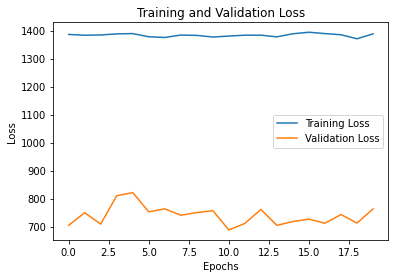

In [16]:
# Assume `history` is the result from fitting the best model
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=20)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### TensorFlow Model: Does the Model Overfit or Underfit the Data?

The image above shows the results of that the model is attempting to underfit the data. Multiple learning rates were tested in an attempt to assist the model, but both ended with the same result (shown above). This could be due to the level of complexity of the model and additional layers may be needed for further analysis. 

### PyTorch Model

In [17]:
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

### Prepare the Data for PyTorch

**Objective**: Convert the NumPy arrays into PyTorch tensors and create DataLoaders for batch processing.


In [18]:
# Convert Data to PyTorch Tensors (convert Series to NumPy arrays with .to_numpy())
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy().reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy().reshape(-1, 1), dtype=torch.float32)

# Create DataLoaders for Training and Testing
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


In [19]:
# Define the model architecture
class AirQualityModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1=20, hidden_dim2=10):
        super(AirQualityModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.output = nn.Linear(hidden_dim2, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = AirQualityModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [20]:
# Training loop
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_test_tensor)
        val_loss = criterion(val_predictions, y_test_tensor).item()
        val_losses.append(val_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch [10/50], Train Loss: 747.0324, Val Loss: 782.4701
Epoch [20/50], Train Loss: 581.7247, Val Loss: 595.8110
Epoch [30/50], Train Loss: 568.1262, Val Loss: 594.9586
Epoch [40/50], Train Loss: 564.3989, Val Loss: 579.7971
Epoch [50/50], Train Loss: 560.8949, Val Loss: 575.5784


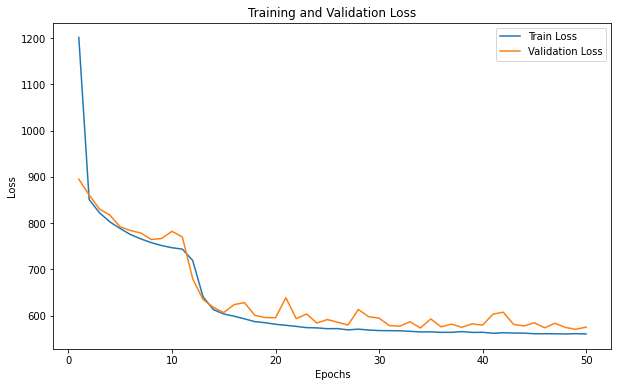

In [21]:
epochs_range = range(1, num_epochs + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

### PyTorch Model: Does the Model Overfit or Underfit the Data?

The model appears to be handling the training process effectively and generalizing well to unseen data. In the plot above, we can see both the training and validation loss decreasing steadily over the epochs, with the two lines staying closely aligned. This close alignment suggests that the model is neither overfitting (where validation loss would diverge above training loss) nor underfitting (where both losses would remain high or fail to decrease).

Therefore, we can conclude that this model is well-trained, with no significant signs of overfitting or underfitting.